In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
raw_df = pd.read_csv("/Users/eamonnmccallum/Monash-DS/gwil_wrk1/data/gwil_datv2.csv")

In [4]:
raw_df["JOB_TITLE"].unique()

array(['HEW Level 1', 'Casuals academic', 'SE ',
       'Academic level A or below', 'Academic level B ',
       'Academic level C ', 'Academic level D and E',
       'Casuals non-academic', 'HEW Level 2', 'HEW Level 10',
       'HEW Level 9', 'HEW Level 8', 'HEW Level 7', 'HEW Level 3',
       'HEW Level 6', 'HEW Level 5', 'HEW Level 4'], dtype=object)

In [5]:
job_df = raw_df[["UNI_TITLE","UNI_ID","JOB_TITLE", "JOB ID","YEAR", "VALUE","GROUP" ,"MED"]]
job_df

,UNI_TITLE,UNI_ID,JOB_TITLE,JOB ID,YEAR,VALUE,GROUP,MED
0,Australian Catholic University,1,HEW Level 1,1,1999,0.0,3,0
1,Australian Catholic University,1,HEW Level 1,1,2000,0.0,3,0
2,Australian Catholic University,1,HEW Level 1,1,2001,0.0,3,0
3,Australian Catholic University,1,HEW Level 1,1,2002,0.0,3,0
4,Australian Catholic University,1,HEW Level 1,1,2003,0.0,3,0
...,...,...,...,...,...,...,...,...
13918,Western Sydney University,39,HEW Level 2,2,2015,0.0,3,1
13919,Western Sydney University,39,HEW Level 2,2,2016,0.0,3,1
13920,Western Sydney University,39,HEW Level 2,2,2017,0.0,3,1
13921,Western Sydney University,39,HEW Level 10,10,2003,0.0,3,1


In [6]:
# Group as per 
bins = [0,4,7,9,10,11,12,13,14,15,16,17]

In [8]:
job_bins = job_df
labels = [1,2,3,4,5,6,7,8,9,10,11]
job_bins["BINS"] = pd.cut(job_bins["JOB ID"], bins, labels=labels, include_lowest=True)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# bins column was originally object needed to be turned to int
job_bins["BINS"] = pd.to_numeric(job_bins["BINS"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
job_bins.sample(10)

,UNI_TITLE,UNI_ID,JOB_TITLE,JOB ID,YEAR,VALUE,GROUP,MED,BINS
1322,University of Canberra,30,HEW Level 10,10,2004,11.50,3,0,4
8550,The Australian National University,21,HEW Level 8,8,1999,161.06,1,1,3
5787,Deakin University,7,HEW Level 8,8,1999,84.20,2,1,3
5874,James Cook University,12,Academic level A or below,11,2017,86.00,2,1,5
11371,Queensland University of Technology,17,HEW Level 4,4,1997,305.97,3,0,1
11718,RMIT University,18,HEW Level 5,5,2013,338.85,3,0,2
3754,Southern Cross University,19,Academic level A or below,11,1997,46.00,3,0,5
4563,Charles Sturt University,4,HEW Level 7,7,2000,59.60,3,0,2
10171,University of Tasmania,34,HEW Level 4,4,2006,230.55,2,1,1
13289,Monash University,15,HEW Level 5,5,2017,785.73,1,1,2


In [17]:
#### HEW 10 ####
hew10 = job_bins.loc[(job_bins["BINS"]== 4)]
hew10

,UNI_TITLE,UNI_ID,JOB_TITLE,JOB ID,YEAR,VALUE,GROUP,MED,BINS
86,University of Technology Sydney,35,HEW Level 10,10,1999,0.23,3,0,4
93,The University of Western Australia,29,HEW Level 10,10,2009,0.28,1,1,4
99,University of South Australia,32,HEW Level 10,10,2015,0.32,3,0,4
110,University of South Australia,32,HEW Level 10,10,2013,0.40,3,0,4
111,University of South Australia,32,HEW Level 10,10,2014,0.40,3,0,4
...,...,...,...,...,...,...,...,...,...
13891,University of Wollongong,37,HEW Level 10,10,2003,0.00,2,1,4
13892,University of Wollongong,37,HEW Level 10,10,2004,0.00,2,1,4
13893,University of Wollongong,37,HEW Level 10,10,2005,0.00,2,1,4
13921,Western Sydney University,39,HEW Level 10,10,2003,0.00,3,1,4


In [19]:
### Academdic A Groups new names require manual assignment

In [20]:
acad_a = job_bins.loc[(job_bins["BINS"]== 5)]
acad_b = job_bins.loc[(job_bins["BINS"]== 6)]
acad_c = job_bins.loc[(job_bins["BINS"]== 7)]
acad_d = job_bins.loc[(job_bins["BINS"]== 8)]
cas_na = job_bins.loc[(job_bins["BINS"]== 9)]
cas_ac = job_bins.loc[(job_bins["BINS"]== 10)]
se = job_bins.loc[(job_bins["BINS"]== 11)]
se_admin = job_bins.loc[(job_bins["BINS"]== 11)|(job_bins["BINS"]== 4)]

In [35]:
uni_sum_1t4_00 = hew1_4.loc[(hew1_4["UNI_ID"]== 1)&(hew1_4["YEAR"]== 2000)]
acadlist = [acad_a, acad_b, acad_c, acad_d,cas_ac]
acad_group = pd.concat(acadlist)
nalist = [hew1_4, hew5_7, hew8_9, hew10, se, cas_na ]
non_acad = pd.concat(nalist)

In [39]:
#Review of jobs type by years to review the change in median pay over time
pop_hew1_4 = hew1_4.groupby("YEAR").mean()
pop_hew1_4["FTE HEW 1 to 4"] = pop_hew1_4["VALUE"]
pop_hew1_4 = pop_hew1_4["FTE HEW 1 to 4"]

pop_hew5_7 = hew5_7.groupby("YEAR").mean()
pop_hew5_7["FTE HEW 5 to 7"] = pop_hew5_7["VALUE"]
pop_hew5_7 = pop_hew5_7["FTE HEW 5 to 7"]

pop_hew8_9 = hew8_9.groupby("YEAR").mean()
pop_hew8_9["FTE HEW 8 to 9"] = pop_hew8_9["VALUE"]
pop_hew8_9 = pop_hew8_9["FTE HEW 8 to 9"]

pop_hew10 = hew10.groupby("YEAR").mean()
pop_hew10["FTE HEW 10"] = pop_hew10["VALUE"]
pop_hew10 = pop_hew10["FTE HEW 10"]

pop_acad_a = acad_a.groupby("YEAR").mean()
pop_acad_a["FTE Academic A"] = pop_acad_a["VALUE"]
pop_acad_a = pop_acad_a["FTE Academic A"]

pop_acad_b = acad_b.groupby("YEAR").mean()
pop_acad_b["FTE Academic B"] = pop_acad_b["VALUE"]
pop_acad_b = pop_acad_b["FTE Academic B"]

pop_acad_c = acad_c.groupby("YEAR").mean()
pop_acad_c["FTE Academic C"] = pop_acad_c["VALUE"]
pop_acad_c = pop_acad_c["FTE Academic C"]

pop_acad_d = acad_d.groupby("YEAR").mean()
pop_acad_d["FTE Academic D & E"] = pop_acad_d["VALUE"]
pop_acad_d = pop_acad_d["FTE Academic D & E"]

pop_se = se.groupby("YEAR").mean()
pop_se["FTE SE Group"] = pop_se["VALUE"]
pop_se = pop_se["FTE SE Group"]

pop_cas_ac = cas_ac.groupby("YEAR").mean()
pop_cas_ac["FTE Academic Casuals"] = pop_cas_ac["VALUE"]
pop_cas_ac = pop_cas_ac["FTE Academic Casuals"]

pop_cas_na = cas_na.groupby("YEAR").mean()
pop_cas_na["FTE Non-Academic Casuals"] = pop_cas_na["VALUE"]
pop_cas_na = pop_cas_na["FTE Non-Academic Casuals"]

In [40]:
mean_of_jobs = pd.concat([pop_hew1_4, pop_hew5_7, pop_hew8_9, pop_hew10, pop_se, pop_acad_a,pop_acad_b, pop_acad_c, pop_acad_d, pop_cas_ac, pop_cas_na], axis=1)


In [41]:
mean_of_jobs

,FTE HEW 1 to 4,FTE HEW 5 to 7,FTE HEW 8 to 9,FTE HEW 10,FTE SE Group,FTE Academic A,FTE Academic B,FTE Academic C,FTE Academic D & E,FTE Academic Casuals,FTE Non-Academic Casuals
YEAR,,,,,,,,,,,
1997,114.181987,143.366496,47.216026,15.902308,21.538462,147.871795,277.025641,193.102564,156.743590,151.846154,122.897436
1998,107.098397,146.201111,48.678718,17.330256,22.897436,145.769231,267.282051,192.461538,158.051282,161.153846,124.128205
1999,101.363269,151.746496,51.546538,19.243590,23.153846,139.384615,259.384615,193.717949,160.717949,177.205128,131.743590
2000,97.230064,157.585043,53.551410,19.390256,22.743590,138.743590,256.794872,195.205128,166.564103,181.358974,136.846154
2001,94.181923,163.211026,57.662179,21.742308,24.487179,140.179487,259.564103,198.589744,169.128205,186.410256,138.051282
2002,92.051667,174.205299,63.898718,23.074103,27.974359,142.461538,265.307692,200.435897,177.205128,201.538462,141.153846
2003,91.394487,184.050684,69.952179,24.638974,28.794872,149.461538,270.923077,204.384615,183.641026,200.282051,139.256410
2004,89.753077,195.086752,74.740256,26.409231,30.358974,156.282051,280.512821,208.769231,191.948718,208.256410,138.948718
2005,87.525321,202.686581,79.138846,28.802051,32.230769,162.333333,290.076923,214.769231,202.153846,203.512821,163.564103


In [42]:
#total percentage increase per bin
zz = pd.DataFrame(round((mean_of_jobs.iloc[-1,:] - mean_of_jobs.iloc[2,:])/mean_of_jobs.iloc[2,:],4))
zz = zz.style.format({0:"{:.2%}"})
zz

,0
FTE HEW 1 to 4,-47.61%
FTE HEW 5 to 7,98.00%
FTE HEW 8 to 9,209.78%
FTE HEW 10,194.04%
FTE SE Group,172.65%
FTE Academic A,42.40%
FTE Academic B,36.22%
FTE Academic C,37.23%
FTE Academic D & E,111.07%
FTE Academic Casuals,96.93%


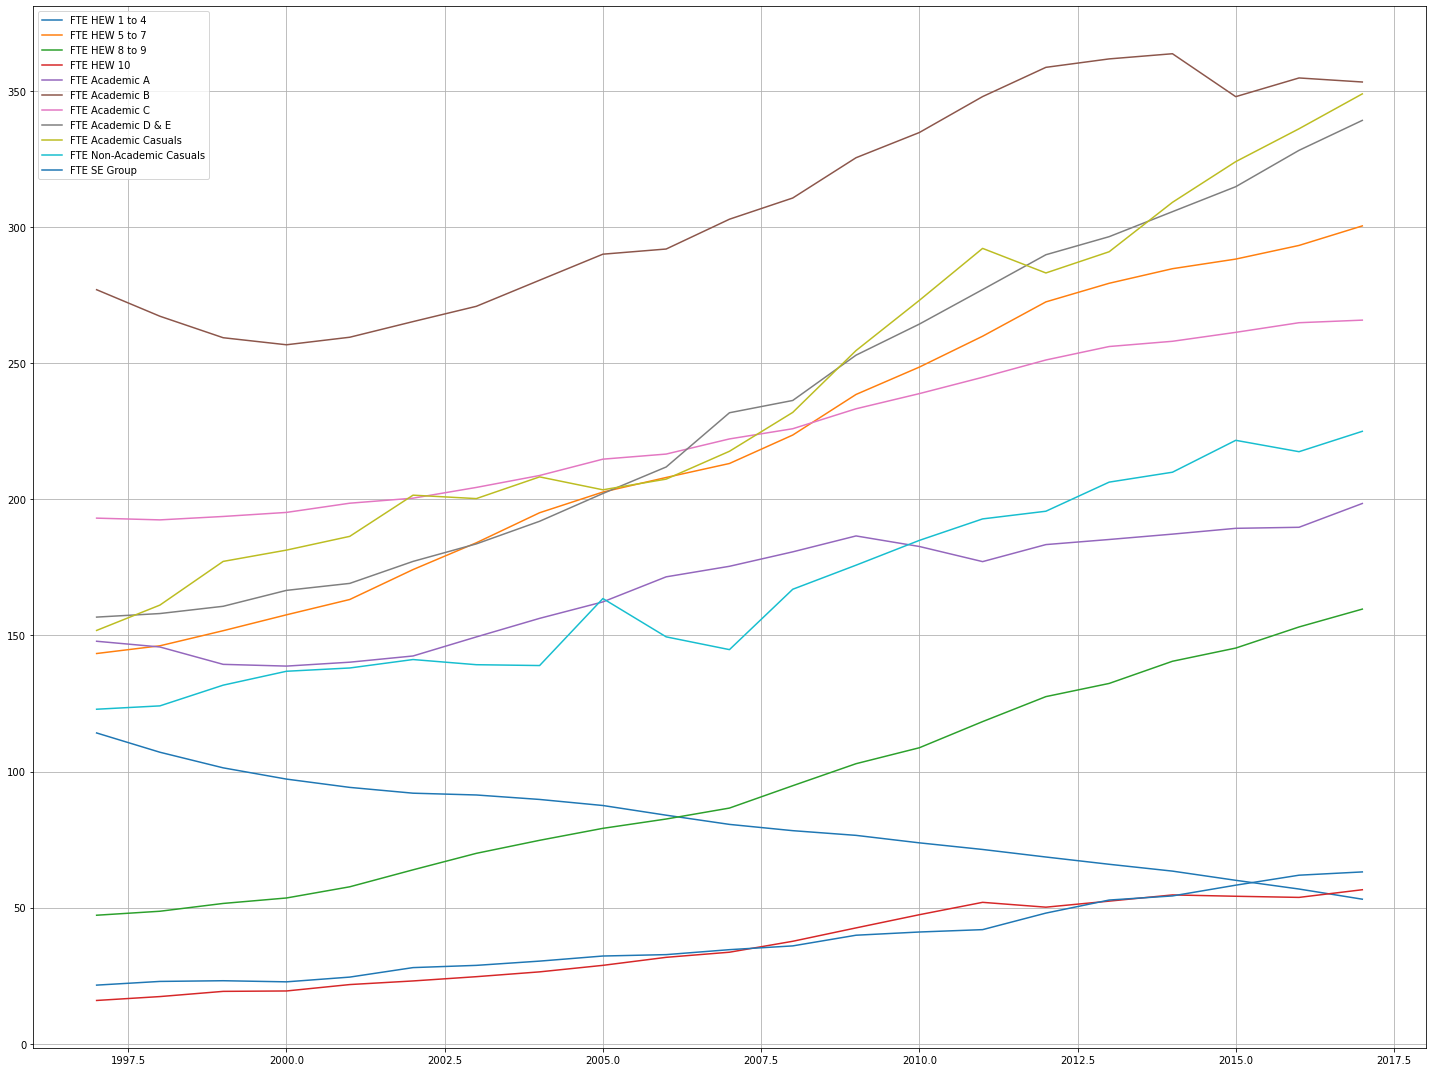

In [43]:
plt.figure(figsize = (20, 15))
plt.plot(mean_of_jobs["FTE HEW 1 to 4"], label="FTE HEW 1 to 4")
plt.plot(mean_of_jobs["FTE HEW 5 to 7"], label="FTE HEW 5 to 7")
plt.plot(mean_of_jobs["FTE HEW 8 to 9"], label="FTE HEW 8 to 9")
plt.plot(mean_of_jobs["FTE HEW 10"], label="FTE HEW 10")
plt.plot(mean_of_jobs["FTE Academic A"], label="FTE Academic A")
plt.plot(mean_of_jobs["FTE Academic B"], label="FTE Academic B")
plt.plot(mean_of_jobs["FTE Academic C"], label="FTE Academic C")
plt.plot(mean_of_jobs["FTE Academic D & E"], label="FTE Academic D & E")
plt.plot(mean_of_jobs["FTE Academic Casuals"], label="FTE Academic Casuals")
plt.plot(mean_of_jobs["FTE Non-Academic Casuals"], label="FTE Non-Academic Casuals")
plt.plot(mean_of_jobs["FTE SE Group"], label="FTE SE Group")
plt.tight_layout()
plt.grid()

plt.legend(loc="upper left")


In [44]:
pecent_job_mean = mean_of_jobs.pct_change(1)

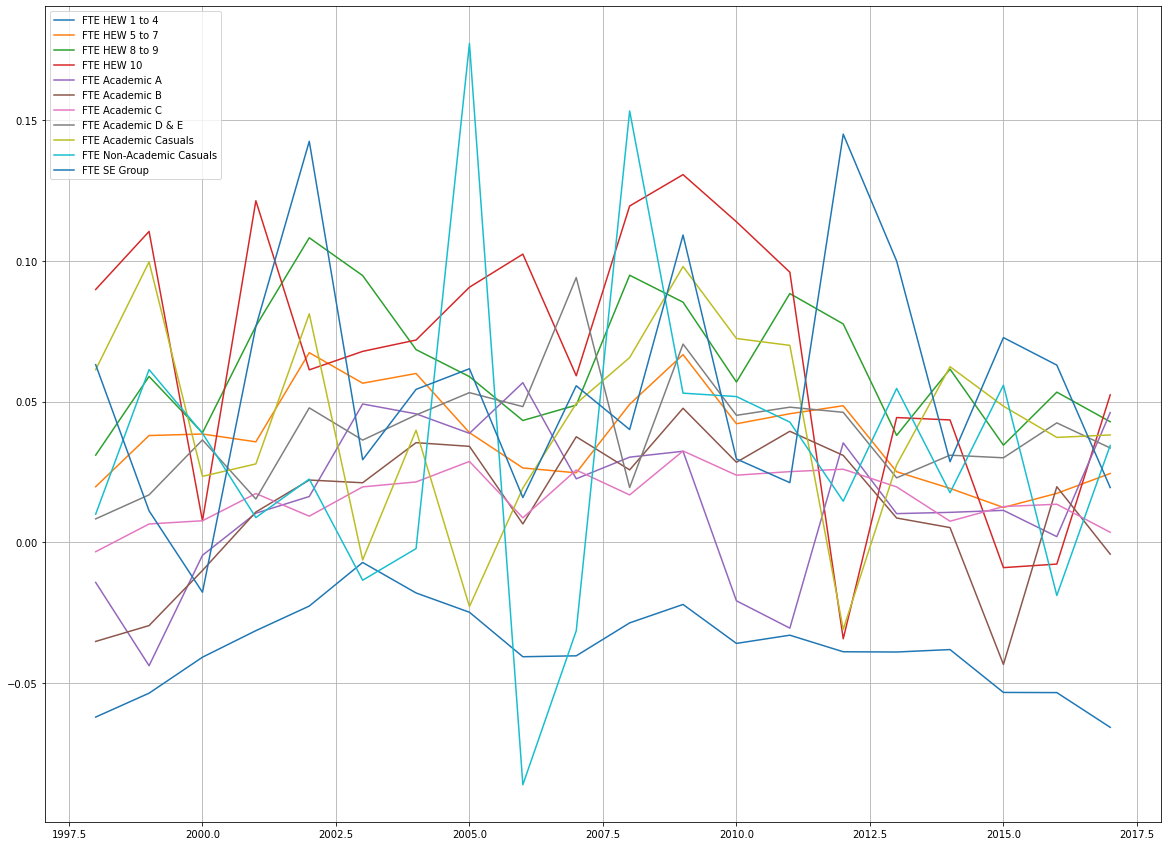

In [45]:
plt.figure(figsize = (20, 15))
plt.plot(pecent_job_mean["FTE HEW 1 to 4"], label="FTE HEW 1 to 4")
plt.plot(pecent_job_mean["FTE HEW 5 to 7"], label="FTE HEW 5 to 7")
plt.plot(pecent_job_mean["FTE HEW 8 to 9"], label="FTE HEW 8 to 9")
plt.plot(pecent_job_mean["FTE HEW 10"], label="FTE HEW 10")
plt.plot(pecent_job_mean["FTE Academic A"], label="FTE Academic A")
plt.plot(pecent_job_mean["FTE Academic B"], label="FTE Academic B")
plt.plot(pecent_job_mean["FTE Academic C"], label="FTE Academic C")
plt.plot(pecent_job_mean["FTE Academic D & E"], label="FTE Academic D & E")
plt.plot(pecent_job_mean["FTE Academic Casuals"], label="FTE Academic Casuals")
plt.plot(pecent_job_mean["FTE Non-Academic Casuals"], label="FTE Non-Academic Casuals")
plt.plot(pecent_job_mean["FTE SE Group"], label="FTE SE Group")

plt.grid()

plt.legend(loc="upper left")

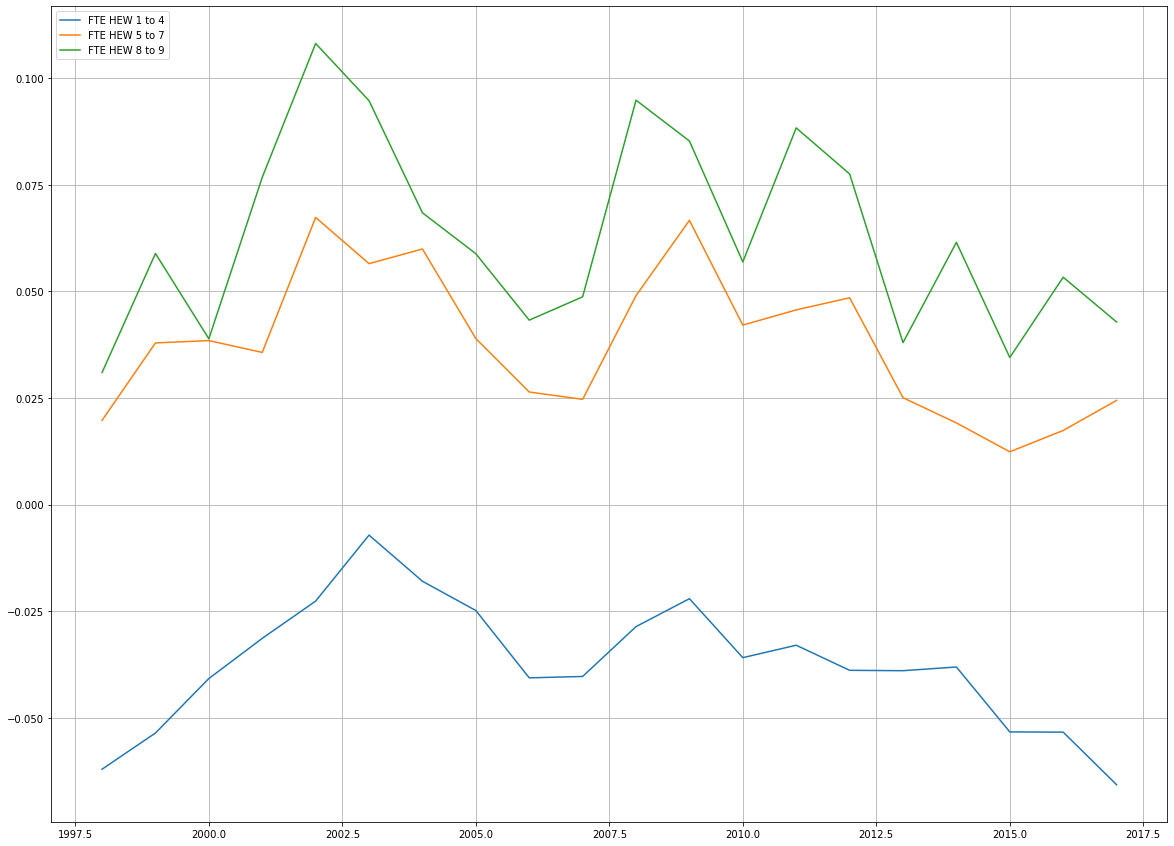

In [46]:
plt.figure(figsize = (20, 15))
plt.plot(pecent_job_mean["FTE HEW 1 to 4"], label="FTE HEW 1 to 4")
plt.plot(pecent_job_mean["FTE HEW 5 to 7"], label="FTE HEW 5 to 7")
plt.plot(pecent_job_mean["FTE HEW 8 to 9"], label="FTE HEW 8 to 9")
plt.grid()

plt.legend(loc="upper left")

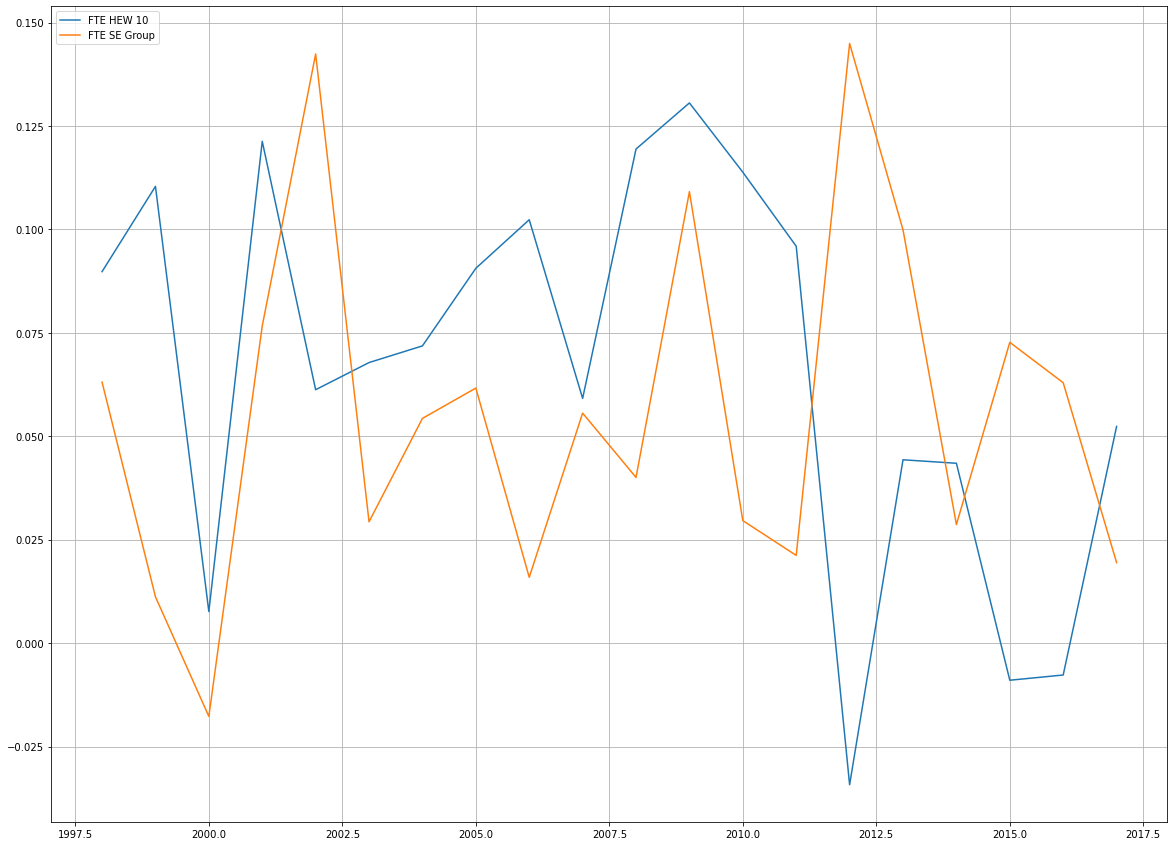

In [47]:
plt.figure(figsize = (20, 15))
plt.plot(pecent_job_mean["FTE HEW 10"], label="FTE HEW 10")
#plt.plot(pecent_job_mean["FTE Academic D & E"], label="FTE Academic D & E")
plt.plot(pecent_job_mean["FTE SE Group"], label="FTE SE Group")

plt.grid()

plt.legend(loc="upper left")

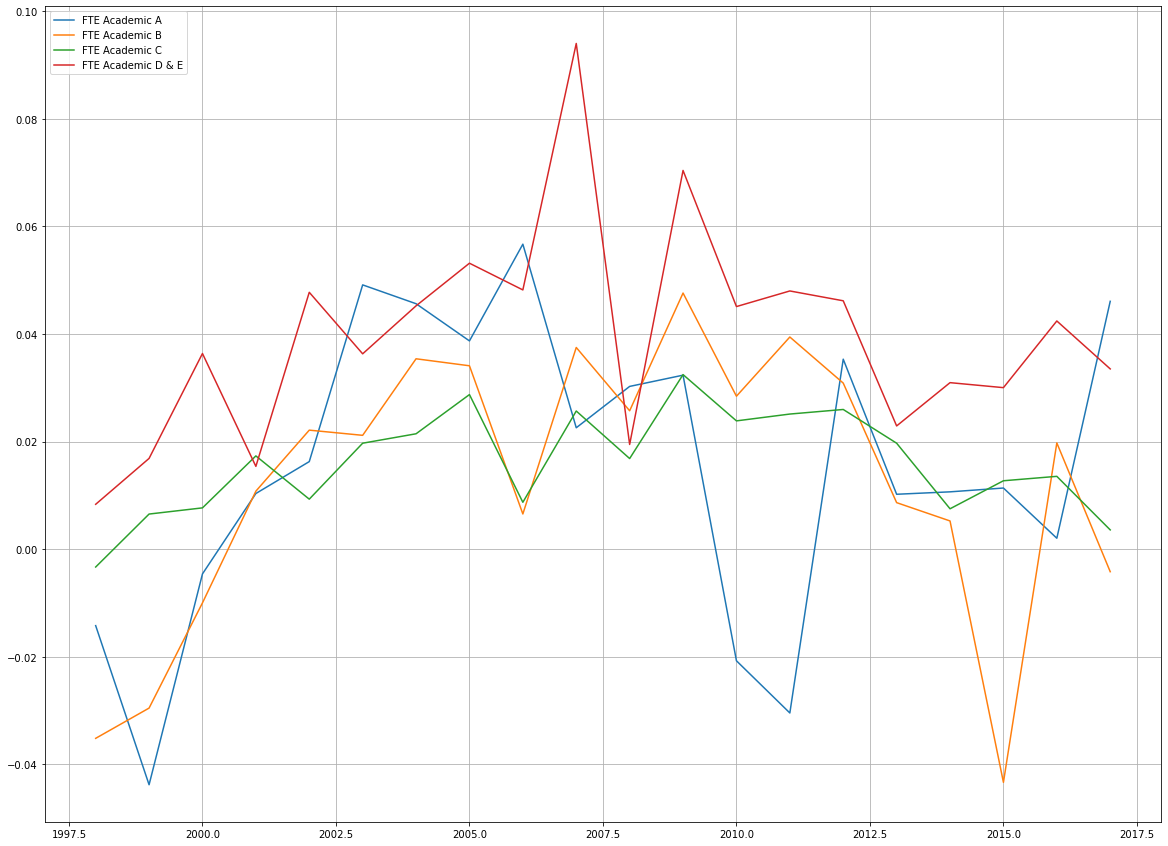

In [48]:
plt.figure(figsize = (20, 15))

plt.plot(pecent_job_mean["FTE Academic A"], label="FTE Academic A")
plt.plot(pecent_job_mean["FTE Academic B"], label="FTE Academic B")
plt.plot(pecent_job_mean["FTE Academic C"], label="FTE Academic C")
plt.plot(pecent_job_mean["FTE Academic D & E"], label="FTE Academic D & E")

plt.grid()

plt.legend(loc="upper left")